# Time Series Data
A time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data.

- https://en.wikipedia.org/wiki/Time_series

In [1]:
import pandas as pd
occupancy = pd.read_csv('./data/occupancy.csv')
print(occupancy.dtypes)
occupancy.date = pd.to_datetime(occupancy.date)
print(occupancy.dtypes)
occupancy.index = pd.DatetimeIndex(occupancy.date, freq='H')
occupancy.index

display(occupancy.head())
print(occupancy.shape[0]/24, "recorded day")

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object
date             datetime64[ns]
Temperature             float64
Humidity                float64
Light                   float64
CO2                     float64
HumidityRatio           float64
Occupancy                 int64
dtype: object


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,,
2015-02-02 14:00:00,2015-02-02 14:00:00,23.7000,26.272,585.200000,749.200000,0.004764,1
2015-02-02 15:00:00,2015-02-02 15:00:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2015-02-02 16:00:00,2015-02-02 16:00:00,23.7300,26.230,572.666667,769.666667,0.004765,1
2015-02-02 17:00:00,2015-02-02 17:00:00,23.7225,26.125,493.750000,774.750000,0.004744,1
2015-02-02 18:00:00,2015-02-02 18:00:00,23.7540,26.200,488.600000,779.000000,0.004767,1


111.0 recorded day


In [2]:
dr = pd.date_range('2015-05-01', periods=24*30, freq='H')
print(dr.shape)
data = occupancy[["CO2","Occupancy"]].loc[dr]
data["Occupancy"] = data["Occupancy"] * data["CO2"].max()
data.plot()

(720,)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


**Check signal autocorrelation with `lagplot`**: Useful to check if time series data is random or not.
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.lag_plot.html



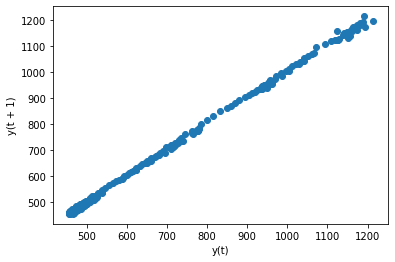

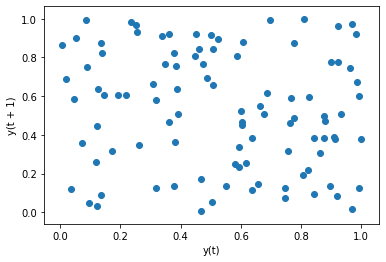

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
pd.plotting.lag_plot(data["CO2"])
plt.figure()
pd.plotting.lag_plot(pd.Series(np.random.random(100)))


### Analysis of a time series data


- **Stationary:** The observations in a stationary time series are not dependent on time.
- **NotStationary** Observations from a non-stationary time series show seasonal effects, trends, and other structures that depend on the time index.


#### Check for stationarity -> Augmented Dickey-Fuller unit root test.
- `from statsmodels.tsa.stattools import adfuller`
- https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.
The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

- **Null Hypothesis (H0):** If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
- **Alternate Hypothesis (H1):** The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

By `p-value`:
 - `p-value > 0.05`: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
 - `p-value <= 0.05`: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [4]:
from statsmodels.tsa.stattools import adfuller

stationaryCheck = lambda X: "Not-Stationary" if adfuller(X)[1] > 0.05 else "Stationary"

q = occupancy._get_numeric_data()
print([(col,stationaryCheck(q[col])) for col in q.columns])
stationaryCheck(np.random.random(100))

/usr/local/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


[('Temperature', 'Not-Stationary'), ('Humidity', 'Not-Stationary'), ('Light', 'Not-Stationary'), ('CO2', 'Not-Stationary'), ('HumidityRatio', 'Not-Stationary'), ('Occupancy', 'Not-Stationary')]


'Stationary'

## Important to analyze
- **Trend:** The increasing or decreasing value in the series.
- **Seasonality:** The repeating short-term cycle in the series.
- **Noise/Residual:** The random variation in the series.


References
- https://www.investopedia.com/articles/trading/07/stationary.asp
- https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/
- https://machinelearningmastery.com/time-series-data-stationary-python/

2015-04-01 00:00:00     983.333333
2015-04-01 01:00:00     974.600000
2015-04-01 02:00:00     961.000000
2015-04-01 03:00:00     954.250000
2015-04-01 04:00:00     951.500000
                          ...     
2015-04-07 19:00:00    1388.600000
2015-04-07 20:00:00    1377.500000
2015-04-07 21:00:00    1374.000000
2015-04-07 22:00:00    1377.600000
2015-04-07 23:00:00    1373.000000
Freq: H, Name: CO2, Length: 168, dtype: float64
Figure(432x288)


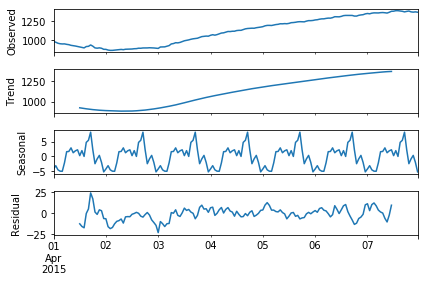

In [5]:
import statsmodels.api as sm
dr = pd.date_range('2015-04-01', periods=24*7, freq='H')
data = occupancy.CO2[dr]
print(data)
res = sm.tsa.seasonal_decompose(data)
print(res.plot())

974.6 961.0


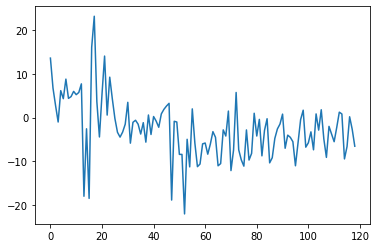

In [6]:
dr = pd.date_range('2015-04-01 01:00:00', periods=24*5, freq='H')
a = occupancy.CO2[dr][0:-1]
b = occupancy.CO2[dr][1:]
print(a[0],b[0])
diff = a.to_numpy()-b.to_numpy()
plt.plot(diff)

# Filtering Time Series Data using FFT
- Sampling frequency [https://en.wikipedia.org/wiki/Nyquist_frequency]
- FFT Example [https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fft.html]
- Get the Spectre plot. Remember to use `np.abs`. Help with axis: `np.fft.fftfreq`


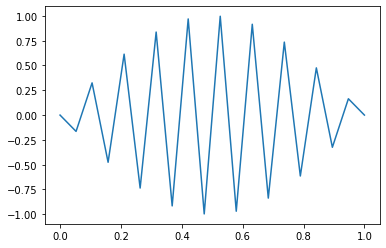

In [7]:
Fm = 20
F = 10
X = np.linspace(0,1,Fm)
Y = np.sin(2*np.pi*F*X)
plt.plot(X,Y)

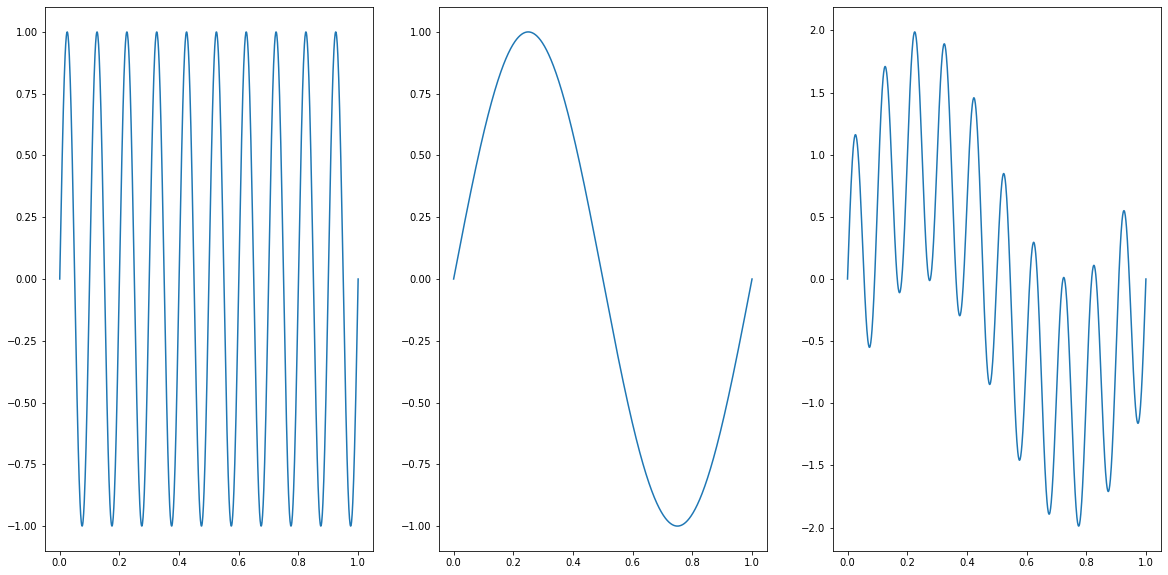

In [8]:
Fm = 1000
F = 10
X = np.linspace(0,1,Fm)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
a = np.sin(2*np.pi*F*X)
plt.plot(X,a)
plt.subplot(1,3,2)
b = np.sin(2*np.pi*X)
plt.plot(X,b)
plt.subplot(1,3,3)
Y = a+b
plt.plot(X,Y)

/usr/local/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


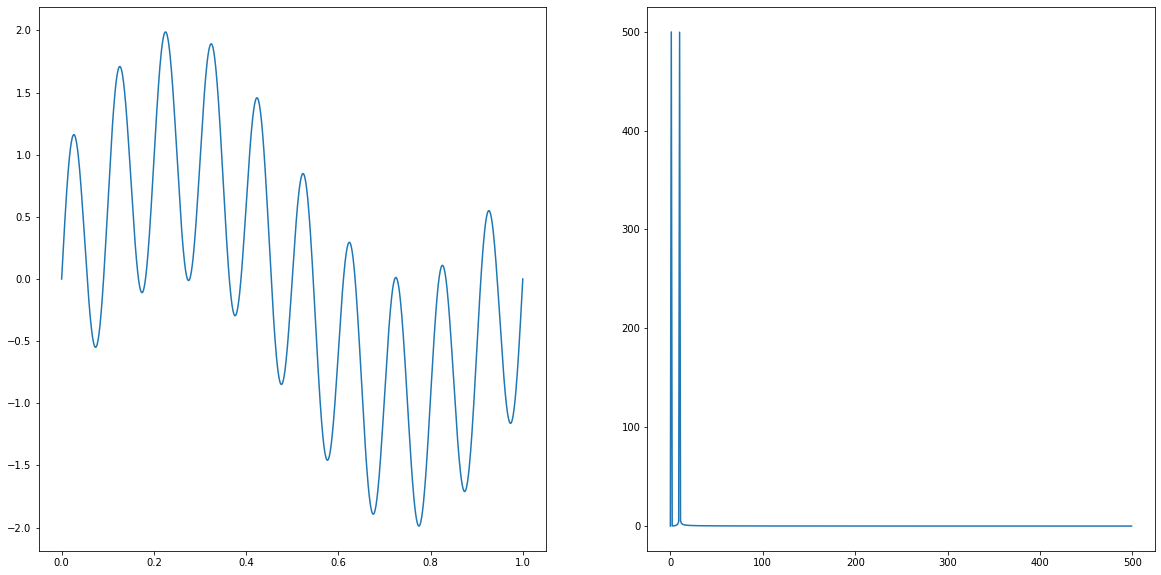

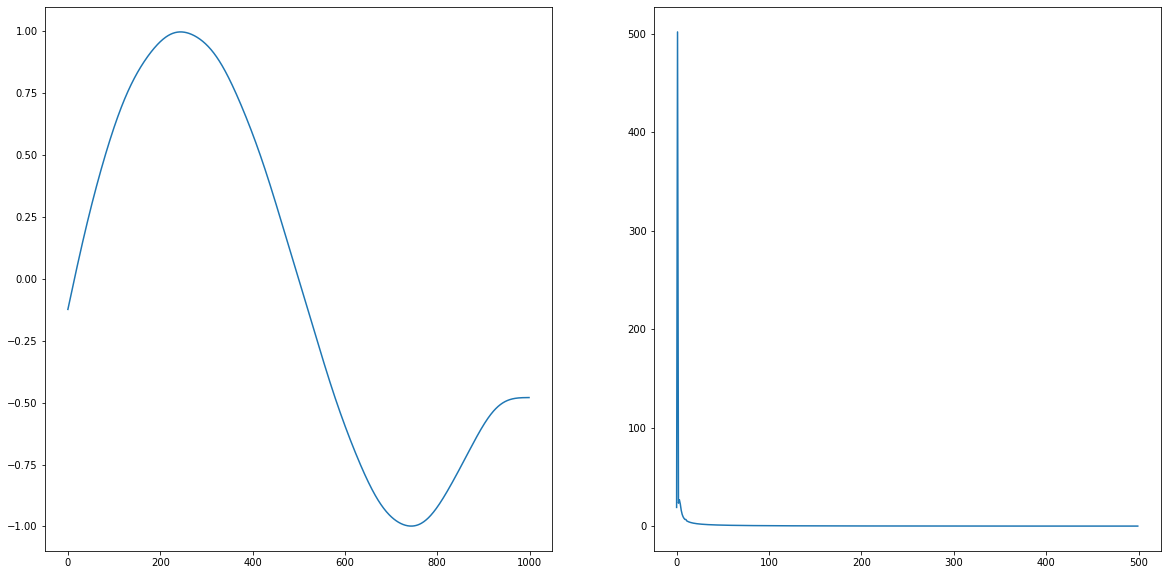

In [9]:
Fm = 1000
X = np.linspace(0,1,Fm)

Y = np.sin(2*np.pi*10*X) + np.sin(2*np.pi*1*X)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(X,Y)

## Calculo de la FFT
from scipy.fftpack import fft
mod = np.abs(fft(Y))
mod = mod[0:len(mod)//2]
plt.subplot(1,2,2)
plt.plot(mod)


from scipy import signal
b, a = signal.butter(3, 7/Fm)
data_filtered = signal.filtfilt(b, a, Y)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(data_filtered)
mod = np.abs(fft(data_filtered))
mod = mod[0:len(mod)//2]
plt.subplot(1,2,2)
plt.plot(mod)


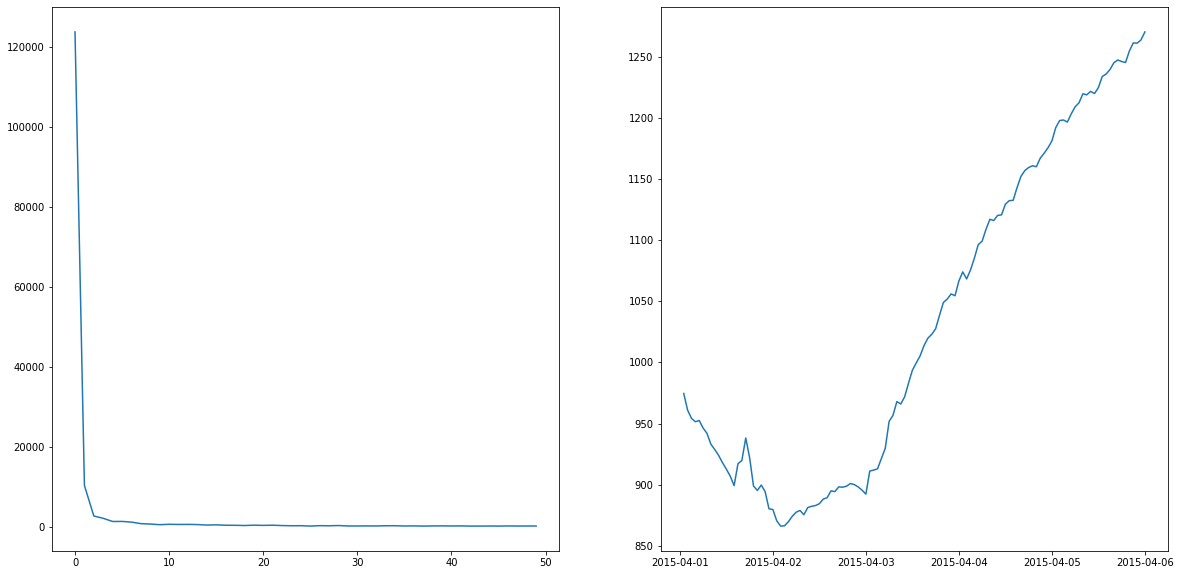

In [10]:
dr = pd.date_range('2015-04-01 01:00:00', periods=24*5, freq='H')

mod = np.abs(fft(occupancy.CO2[dr]))
mod = mod[0:len(mod)//2][:50]
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(mod)
plt.subplot(1,2,2)
plt.plot(occupancy.CO2[dr])

# Apply a low pass filter to clean the data
- Filter a sine signal with high frequency sine noise
    1. Define filter cutoff frequency and degree
        `b, a = signal.butter(3, 1/10)`
    2. Apply modeled filter to data
        `data_filtered = signal.filtfilt(b, a, data)`

/usr/local/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


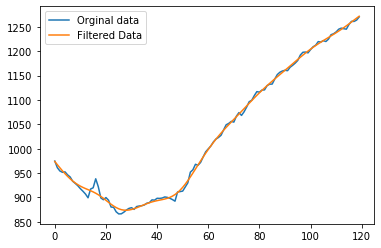

In [11]:
from scipy import signal
dr = pd.date_range('2015-04-01 01:00:00', periods=24*5, freq='H')

data = occupancy.CO2[dr]

b, a = signal.butter(3, 1/10)
data_filtered = signal.filtfilt(b, a, data)

plt.plot(data.to_numpy())
plt.plot(data_filtered)
plt.legend(["Orginal data","Filtered Data"])

# Predicting time series data

- **Autoregressive Model:** The autoregressive model specifies that the output variable depends linearly on its own previous values
    - `from statsmodels.tsa.ar_model import AR`


- **Moving Average:** 
    - https://stackoverflow.com/questions/13728392/moving-average-or-running-mean
    - `np.convolve(x, np.ones((N,))/N, mode='valid')`


- **Autoregressive Moving Average ARMA(p,q) Model**: Is the sum o
    - `from statsmodels.tsa.arima_model import ARMA`
    
    
### References:
- https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AR.html
- https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARMA.html
- https://towardsdatascience.com/implementing-moving-averages-in-python-1ad28e636f9d
- https://en.wikipedia.org/wiki/Autoregressive%E2%80%93moving-average_model
- https://en.wikipedia.org/wiki/Moving-average_model

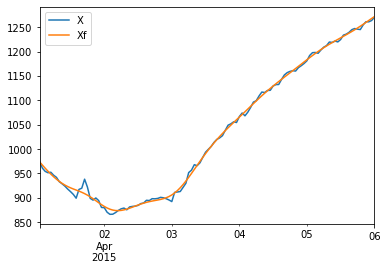

In [12]:
# AR Model
df = pd.DataFrame({
    "X":data.to_numpy(),
    "Xf": data_filtered
},index=pd.date_range('2015-04-01 01:00:00', periods=24*5, freq='H'))
df.plot()


In [13]:
dr = df.index
print(dr, dr.shape)
realidad = df.loc[dr[0:100]]
futuro = df.loc[dr[100:]]

DatetimeIndex(['2015-04-01 01:00:00', '2015-04-01 02:00:00',
               '2015-04-01 03:00:00', '2015-04-01 04:00:00',
               '2015-04-01 05:00:00', '2015-04-01 06:00:00',
               '2015-04-01 07:00:00', '2015-04-01 08:00:00',
               '2015-04-01 09:00:00', '2015-04-01 10:00:00',
               ...
               '2015-04-05 15:00:00', '2015-04-05 16:00:00',
               '2015-04-05 17:00:00', '2015-04-05 18:00:00',
               '2015-04-05 19:00:00', '2015-04-05 20:00:00',
               '2015-04-05 21:00:00', '2015-04-05 22:00:00',
               '2015-04-05 23:00:00', '2015-04-06 00:00:00'],
              dtype='datetime64[ns]', length=120, freq='H') (120,)


In [41]:
# https://img.huffingtonpost.com/asset/5d10d087240000511793399f.png?ops=scalefit_630_noupscale
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA

predictions = dict()

for col in realidad.columns:
    train = realidad[col]
    test = futuro[col]

    # Entrena el modelo AR
    model = AR(train)
    print(f"Entrenando con los datos desde la serie {col}")
    model_fit = model.fit(maxlag=10)
    
     # Predice los valores AR
    predictions[col] = model_fit.predict(start=len(train),
                                    end=len(train)+len(test)-1, dynamic=False)
    
   
pred = pd.DataFrame(predictions)
pred

Entrenando con los datos desde la serie X
Entrenando con los datos desde la serie Xf


,X,Xf
2015-04-05 05:00:00,1200.077520,1204.143674
2015-04-05 06:00:00,1206.086233,1207.923248
2015-04-05 07:00:00,1210.767716,1211.537049
2015-04-05 08:00:00,1214.430517,1214.977331
2015-04-05 09:00:00,1217.438042,1218.232208
2015-04-05 10:00:00,1221.617702,1221.284833
2015-04-05 11:00:00,1225.664314,1224.114550
2015-04-05 12:00:00,1229.588615,1226.699808
2015-04-05 13:00:00,1233.280749,1229.022068
2015-04-05 14:00:00,1237.147496,1231.069452


In [42]:
# Sin fantasia
#pd.DataFrame({
#    "X_pred-X_futuro": pred["X"] - futuro["X"],
#    "Xf_pred-Xf_futuro": pred["X"] - futuro["X"],
#})

# Con fantasia
q = {f"{var}_pred-{var}_futuro":pred[var] - futuro[var] for var in pred.columns}
pd.DataFrame(q)


,X_pred-X_futuro,Xf_pred-Xf_futuro
2015-04-05 05:00:00,-3.172480,-0.000547
2015-04-05 06:00:00,-2.913767,-0.004802
2015-04-05 07:00:00,-1.482284,-0.022293
2015-04-05 08:00:00,-5.169483,-0.073063
2015-04-05 09:00:00,-1.311958,-0.190179
2015-04-05 10:00:00,0.017702,-0.419035
2015-04-05 11:00:00,5.864314,-0.813016
2015-04-05 12:00:00,4.921948,-1.426697
2015-04-05 13:00:00,-0.469251,-2.309061
2015-04-05 14:00:00,1.397496,-3.499102


## Error metrics
- **Mean Square Error**: It is the average of square of difference between the predicted values and true values.  It has the same units as the true and predicted values squared and is always positive.
- **Root Mean Square Error**: It is the square root of the mean square error. It is also always positive and is in the range of the data.

[https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html]
[https://www.tutorialspoint.com/time_series/time_series_error_metrics.htm]

In [43]:
from sklearn.metrics import mean_squared_error

# squared => If True returns MSE value, if False returns RMSE value.
for col in pred.columns:
    mse = mean_squared_error(futuro[col], pred[col])
    rmse = np.sqrt(mse)
    print(f"{col} ->  MSE={mse} RMSE={rmse}")

X ->  MSE=31.698572228327436 RMSE=5.6301485085499685
Xf ->  MSE=196.4432789025879 RMSE=14.015822448311333


### Labs:
- https://github.com/ironhack-datalabs/datamad0120/tree/master/module-2/lab-time-series

<img src="https://media2.giphy.com/media/CNgNBnSAobcBO/giphy.gif?cid=790b7611c6105d31b5ccfcdbb3ebdc88c44b0f2db036dd38&rid=giphy.gif">

In [36]:
# https://github.com/boyander/datamad-1019/blob/master/w6-d3-time-series-data.ipynb

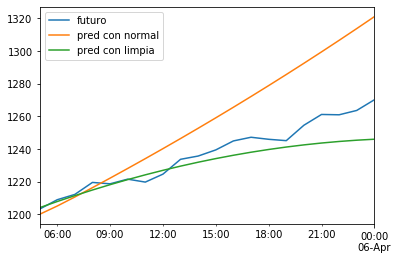

In [39]:
futuro["X"].plot()
pred["X"].plot()
pred["Xf"].plot()
plt.legend(["futuro","pred con normal","pred con limpia"])